## Carga de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plot

In [2]:
df_A = pd.read_csv(r"Datos\a. Modulo_A-C-X-CF.csv", encoding='ISO-8859-1', sep=";")
df_B = pd.read_csv(r"Datos\b. Modulo_B.csv", encoding='ISO-8859-1', sep=";")
df_C = pd.read_csv(r"Datos\c. Modulo_C1.csv", encoding='ISO-8859-1', sep=";")
df_D = pd.read_csv(r"Datos\d. Modulo_D_E.csv", encoding='ISO-8859-1', sep=";")
df_E = pd.read_csv(r"Datos\e. Modulo_viajes.csv", encoding='ISO-8859-1', sep=";")
df_F = pd.read_csv(r"Datos\f. Modulo_Etapas.csv", encoding='ISO-8859-1', sep=";")


C:\Users\luluf\AppData\Local\Temp\ipykernel_15992\3668038309.py:4: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  df_D = pd.read_csv(r"Datos\d. Modulo_D_E.csv", encoding='ISO-8859-1', sep=";")


In [3]:
# Para revisar los elementos cargados. 
%whos

Variable   Type         Data/Info
---------------------------------
df_A       DataFrame             i3  val_i3     u<...>[22755 rows x 66 columns]
df_B       DataFrame           OrderX  b4  b5  b6<...>[67556 rows x 26 columns]
df_C       DataFrame           c2 c3           Na<...>[11838 rows x 16 columns]
df_D       DataFrame           d2  Age  val_b22.2<...>[67556 rows x 40 columns]
df_E       DataFrame            OrderJourney  d11<...>100174 rows x 25 columns]
df_F       DataFrame            StageX  d13 d13_o<...>110881 rows x 23 columns]
pd         module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plot       module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>


## Limpiar datos

**Se tienen como municipios o areas de interes a:**
* Bogota : 11001
* Chia : 25175
* Cota :  25214
* Funza : 25286
* Mozquera : 25473
* Soacha : 25745
* Sopo :  25754
* La Calera : 25377


**Se plantearon como variables de interes:**

* UTAM  - Unidades Territoriales de Análisis de Movilidad
* ZAT - Zonas de análisis de transporte 
* Departamento, Barrio/Vereda
* Tipo de vivienda: Casa, Apartamento, inquilinato, Vivienda indígena,Otro tipo de vivienda
* Número de hogares en la vivienda
* Número total de personas que viven en el hogar
* Total de vehículos con placa
* Rango de ingresos


### Capitulo A

In [4]:
#Revisar el numero de registros y el tipo de cada columna 
df_A.info()

# Se filtra por municipios 
id_munis = [11001, 25175, 25214, 25286, 25473, 25745, 25754, 25377]
df_A2 = df_A.loc[df_A['cod_mpio'].isin(id_munis)]

# Municipios
print(df_A2["cod_mpio"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22755 entries, 0 to 22754
Data columns (total 66 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   i3                22755 non-null  int64  
 1   val_i3            22755 non-null  int64  
 2   utam              22755 non-null  object 
 3   zat               22755 non-null  int64  
 4   cod_depto         22755 non-null  int64  
 5   cod_mpio          22755 non-null  int64  
 6   cod_loc           17506 non-null  float64
 7   estrato           17506 non-null  float64
 8   upz               17506 non-null  object 
 9   cod_dane          22755 non-null  object 
 10  zona              22755 non-null  int64  
 11  sector            22755 non-null  int64  
 12  seccion           22755 non-null  int64  
 13  manzana           22755 non-null  int64  
 14  tipo              22755 non-null  object 
 15  info_base         22755 non-null  object 
 16  i4                22755 non-null  object

In [ ]:
# Unidades Territoriales analisis de movilidad
print(df_A2["utam"].value_counts())

utam
UTAM064    391
UTAM575    390
UTAM053    386
UPR0003    312
UTAM088    306
          ... 
UTAM101     43
UTAM003     36
UTAM002     31
UPR0004     26
UTAM117      2
Name: count, Length: 128, dtype: int64

In [ ]:
# Zonas de analisis de transporte

#Hay dos variables con la informacion de las zat
print(df_A2["zat"].equals(df_A2["zat_ref"]))
desiguales = df_A2[df_A2['zat'] != df_A2['zat_ref']]
p1 = ['zat', 'zat_ref', 'cod_mpio', 'utam']
print(desiguales[p1].info)


     zat  zat_ref  cod_mpio     utam
299  220      219     11001  UTAM103
300  220      219     11001  UTAM103
301  220      219     11001  UTAM103
302  220      219     11001  UTAM103
303  220      219     11001  UTAM103
304  220      219     11001  UTAM103
305  220      219     11001  UTAM103
307  220      219     11001  UTAM103
308  220      219     11001  UTAM103
309  220      219     11001  UTAM103
<bound method DataFrame.info of        zat  zat_ref  cod_mpio     utam
299    220      219     11001  UTAM103
300    220      219     11001  UTAM103
301    220      219     11001  UTAM103
302    220      219     11001  UTAM103
303    220      219     11001  UTAM103
...    ...      ...       ...      ...
22729  198      201     11001  UTAM116
22730  198      201     11001  UTAM116
22731  198      201     11001  UTAM116
22732  198      201     11001  UTAM116
22733  198      201     11001  UTAM116

[497 rows x 4 columns]>
0
0


In [ ]:
#Localidad 

#Hay dos columnas que tienen el codigo de localidad, pero no son iguales
print(df_A2["cod_i4c"].equals(df_A2["cod_loc"]))
desiguales = df_A2[df_A2['cod_i4c'] != df_A2['cod_loc']]
p1 = ['cod_i4c', 'cod_loc', 'cod_mpio', 'utam', 'zat']
print(desiguales[p1].info())



,cod_i4c,cod_loc,cod_mpio,utam,zat
13963,5.0,19.0,11001,UPR0003,764
13964,5.0,19.0,11001,UPR0003,764
13965,5.0,19.0,11001,UPR0003,764
13966,5.0,19.0,11001,UPR0003,764
13967,5.0,19.0,11001,UPR0003,764
13968,5.0,19.0,11001,UPR0003,764
13969,5.0,19.0,11001,UPR0003,764
13970,5.0,19.0,11001,UPR0003,764
13971,5.0,19.0,11001,UPR0003,764
16226,NaN,NaN,25175,UTAM590,907


In [ ]:
# Barrio / Vereda
print(df_A2["cod_i7"].value_counts())

cod_i7
99999999    2667
2595         391
5110         306
6217         255
5104         216
            ... 
6504           2
9110           1
2520           1
108110         1
108108         1
Name: count, Length: 649, dtype: int64

In [24]:
# Tipo de vivienda
print(df_A2["i7b"].value_counts())

i7b
1    11349
2     8370
3      353
4       96
6        5
Name: count, dtype: int64


In [31]:
# Numero de Hogares por vivienda
print(df_A2["a6"].value_counts())

a6
1    16032
2     3097
3      980
4       56
5        8
Name: count, dtype: int64


a7
2     5289
3     5102
4     3866
1     3307
5     1660
6      571
7      241
8       81
9       33
10      22
11       1
Name: count, dtype: int64


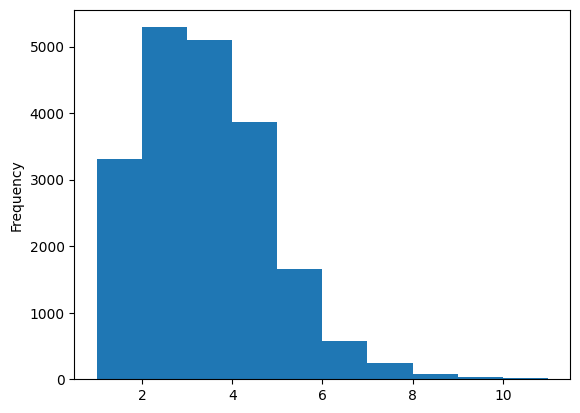

In [33]:
# Numero de personas por hogar
df_A2["a7"].plot.hist()
print(df_A2["a7"].value_counts())

In [10]:
#Tipos de veihiculos
print(df_A2["c1"].value_counts())

#Reclasificacion a mano
print(df_A2["c1a"].value_counts())
print(df_A2["c1a"].head())


c1
88       9189
A        3273
M        2280
E        1858
A M       613
         ... 
M A U       1
J A U       1
N E         1
A I         1
B E J       1
Name: count, Length: 248, dtype: int64
c1a
1.0    4610
2.0     497
3.0      30
4.0       7
5.0       5
Name: count, dtype: int64
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: c1a, dtype: float64
